In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data = data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


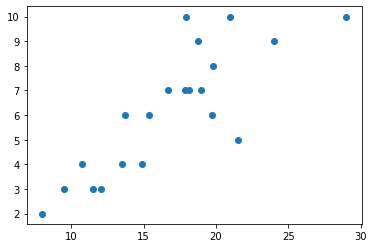

In [6]:
#visualizing the data
#scatter plot
plt.scatter(data['DT'],data['ST'])

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
x = data.iloc[: , :-1].values
y = data .iloc[:,1].values 
x

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [9]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x , y )

LinearRegression()

In [11]:
y_pred = regressor.predict(x)
y_pred

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

In [12]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y ,  y_pred))

0.6822714748417231


In [14]:
print(regressor.predict ( [ [18.830000 ] ] ) )

[7.03411915]


In [15]:
regressor.coef_

array([0.41374363])

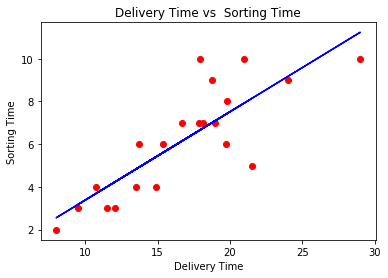

In [16]:
plt.scatter(x,y, color = 'red')
plt.plot(x, regressor.predict(x), color = "blue")
plt.title("Delivery Time vs  Sorting Time")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

In [17]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data).fit()
model

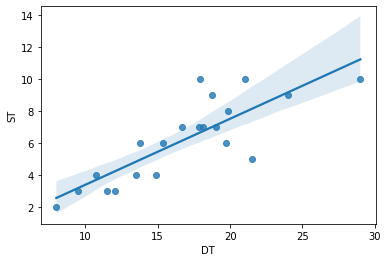

In [18]:
sns.regplot(x="DT", y="ST", data=data);

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        10:08:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [21]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

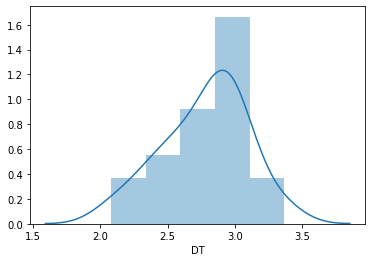

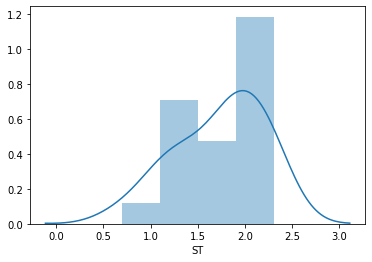

<Figure size 432x288 with 0 Axes>

In [22]:
data['DT'] = np.log(data['DT'])
data['ST'] = np.log(data['ST'])
sns.distplot(data['DT'])
fig = plt.figure()
sns.distplot(data['ST'])
fig = plt.figure()

C:\Users\vaish\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


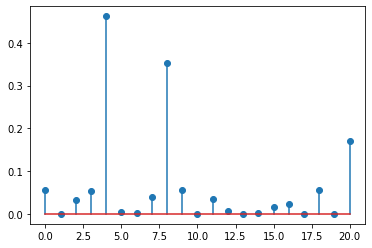

In [23]:
#as rsquare value is less so trying to improve the model
#calculating cooks distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range((data.shape[0])),c)
plt.show()

In [32]:
#now looking for outliers
(np.argmax(c),np.max(c))
#removing 4th row as cooks distance for this is very high as compared to for other rows
data=data.drop(data.index[[4]],axis=0).reset_index()

In [33]:
#again building the model
data=data.drop('index',axis=1)
data

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,2.251292,1.098612
5,2.884801,2.302585
6,2.931194,2.197225
7,2.987196,2.079442
8,2.374906,1.386294
9,2.814210,1.945910


In [27]:
#delivery time is dependent variable 
model=smf.ols("DT~ST",data).fit()
model.rsquared

0.7642919597254191

In [29]:
data.corr()

,DT,ST
DT,1.000000,0.874238
ST,0.874238,1.000000
